In [40]:
library("DataComputing")
library(repr)

options(repr.plot.width=8, repr.plot.height=5)

In [67]:
load("ScorecardSmall.Rda")

In [65]:
CleanedScorecard = ScorecardSmall %>%
    select(CONTROL, INSTNM, ADM_RATE, CCSIZSET, AVGFACSAL, TUITFTE, NPT4_PUB, NPT4_PRIV, NPT41_PUB:NPT45_PRIV) %>%
    filter(CONTROL != 3, !CCSIZSET %in% c(1, 6, 7, 8))

In [23]:
translate_table = read.csv('NPT4-names.csv')
translate_table

,long_name,short_name
1,NPT41_PUB,Q1
2,NPT42_PUB,Q2
3,NPT43_PUB,Q3
4,NPT44_PUB,Q4
5,NPT45_PUB,Q5
6,NPT41_PRIV,Q1
7,NPT42_PRIV,Q2
8,NPT43_PRIV,Q3
9,NPT44_PRIV,Q4
10,NPT45_PRIV,Q5


Warning message:
: Removed 6 rows containing non-finite values (stat_smooth).Warning message:
: Removed 6 rows containing missing values (geom_point).

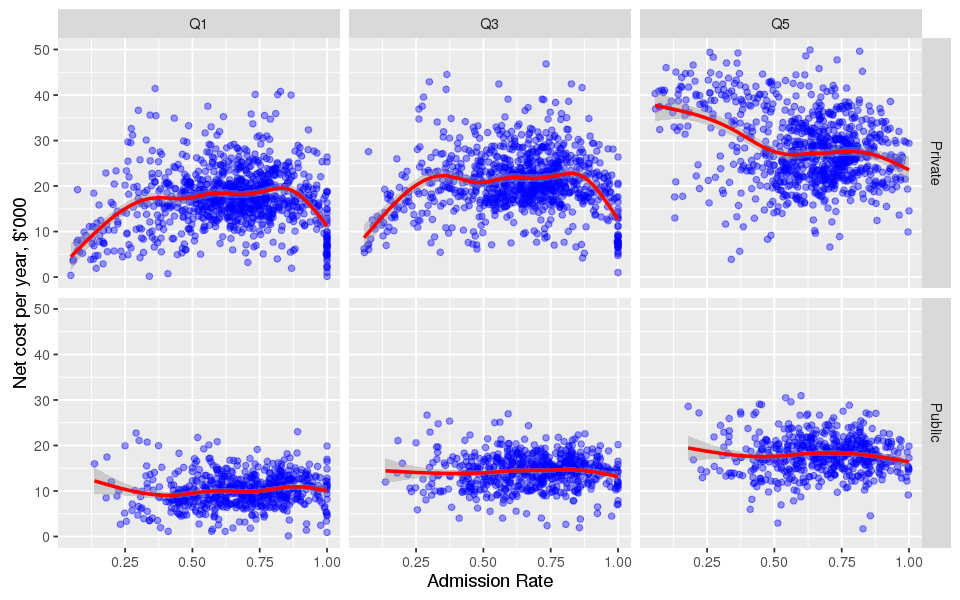

In [64]:
CleanedScorecardPub = CleanedScorecard %>%
    filter(CONTROL == 1) %>%
    select(CONTROL, ADM_RATE, Q1=NPT41_PUB, Q3=NPT43_PUB, Q5=NPT45_PUB) %>%
    gather(IncomeLevel, CollegeCost, Q1, Q3, Q5) %>%
    na.omit()

CleanedScorecardPriv = CleanedScorecard %>%
    filter(CONTROL == 2) %>%
    select(CONTROL, ADM_RATE, Q1=NPT41_PRIV, Q3=NPT43_PRIV, Q5=NPT45_PRIV) %>%
    gather(IncomeLevel, CollegeCost, Q1, Q3, Q5) %>%
    na.omit()

plot_data = rbind(CleanedScorecardPub, CleanedScorecardPriv)
plot_data$CONTROL = factor(plot_data$CONTROL, levels=c(2, 1), label=c("Private", "Public"))
plot_data$IncomeLevel = factor(plot_data$IncomeLevel)
plot_data = plot_data %>%
    mutate(CollegeCost = CollegeCost / 1000)


ggplot(plot_data, aes(x=ADM_RATE, y=CollegeCost)) +
    facet_grid(CONTROL ~ IncomeLevel) +
    geom_point(color="blue", alpha=0.4) +
    geom_smooth(color="red") +
    xlab("Admission Rate") +
    ylab("Net cost per year, $'000") +
    scale_y_continuous(limits=c(0, 50))